 <font color = 'green[link text](https://)'> <b> Gradiant Boosting Regressor

# **Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets For Machine Learning/Salary Data (1).csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.isnull().sum() #finding null values

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())  #Handling null values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode().iloc[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode().iloc[0])
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender']) # converting the categorical data into numerical
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Job Title'] = le.fit_transform(df['Job Title'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


<font color = 'orange'> <b> **Understand the dataset, it's important.**

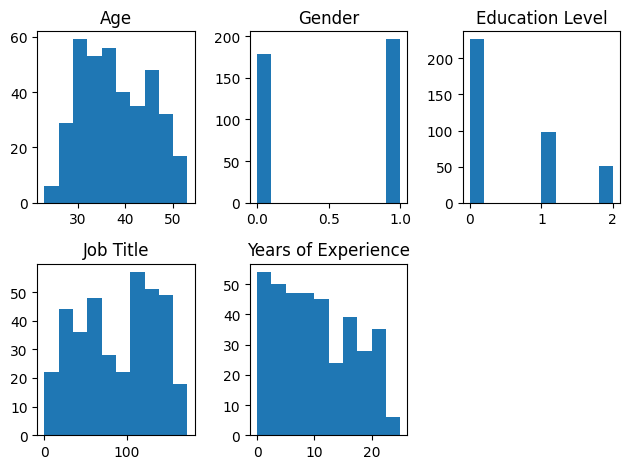

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1) # will print multiple plots in a single figure using subplot
plt.subplot(2,3,1) #grid of row - 2, column - 3; 1 represents the first plot
plt.hist(df['Age'])
plt.title('Age')

plt.subplot(2,3,2)
plt.hist(df['Gender']) #histogram
plt.title('Gender')

plt.subplot(2,3,3)
plt.hist(df['Education Level'])
plt.title('Education Level')

plt.subplot(2,3,4)
plt.hist(df['Job Title'])
plt.title('Job Title')

plt.subplot(2,3,5)
plt.hist(df['Years of Experience'])
plt.title('Years of Experience')

plt.tight_layout() # separates the plots with optimum distance for better view

Text(0.5, 1.0, 'Salary')

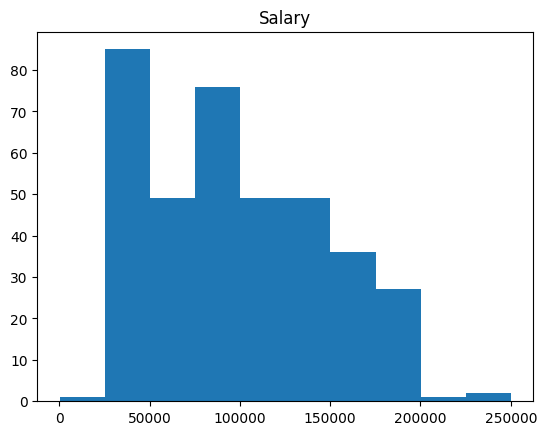

In [ ]:
plt.hist(df['Salary'])
plt.title('Salary')

Log normal distribution

In [ ]:
# Finding outlier
z_score = (df['Salary'] - df['Salary'].mean())/df['Salary'].std()
z_score

,Salary
0,-0.219854
1,-0.739487
2,1.027266
3,-0.843413
4,2.066533
...,...
370,-0.323780
371,1.442973
372,-1.259120
373,-0.219854


In [ ]:
for i in z_score:
  if i > 3:
    print('outlier:',i)
  elif i<-3:
    print('outlier:',i)
  else:
    continue

outlier: 3.105799080581916
outlier: 3.105799080581916


In [ ]:
# indx1 = z_score.index[z_score == 3.105799080581916][1] # taking the 2nd value of the array
indx = z_score.index[z_score == 3.105799080581916] # storing the index values as an array
indx

Index([30, 83], dtype='int64')

In [ ]:
# Another technique of finding the outlier
outliers = df[(z_score > 3) | (z_score < -3)] # | is bitwise or operator
outliers

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,1,0,6,25.0,250000.0
83,52.0,1,2,8,24.0,250000.0


In [ ]:
#index1 = df[z_score > 3].index
#index2 = df[z_score < -3].index

Target vlues cannot be manipulated. So, the outliers cannot be replaced by othe values.  
One solution can be that we drop the value.

In [ ]:
df.drop(indx, inplace = True) # dropping all the outlier.
                              # all index stored in 'indx' will be dropped

In [ ]:
outliers = df[(z_score > 3) | (z_score < -3)]
outliers

<ipython-input-19-3761236399>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[(z_score > 3) | (z_score < -3)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


<font color = 'blue'> <b> **Magic Code!**

In [ ]:
df['Salary'] = np.log(df['Salary'])
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,11.407565
1,28.0,0,1,17,3.0,11.082143
2,45.0,1,2,130,15.0,11.918391
3,36.0,0,0,101,7.0,11.002100
4,52.0,1,1,22,20.0,12.206073
...,...,...,...,...,...,...
370,35.0,0,0,131,8.0,11.350407
371,43.0,1,1,30,19.0,12.043554
372,29.0,0,0,70,2.0,10.596635
373,34.0,1,0,137,7.0,11.407565


In [ ]:
z_score = (df['Salary'] - df['Salary'].mean())/df['Salary'].std()

In [ ]:
# this block is not necessary if we use the next block to find outlier
for i in z_score:
  if i > 3:
    print('outlier:',i)
  elif i<-3:
    print('outlier:',i)
  else:
    continue

outlier: -9.424458660985724


In [ ]:
outliers = df[(z_score > 3) | (z_score < -3)]
outliers

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,1,0,51,1.5,5.857933


Index of the outlier is 259

In [ ]:
df.drop(259, inplace = True)

In [ ]:
outliers = df[(z_score > 3) | (z_score < -3)]
outliers

<ipython-input-26-3761236399>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[(z_score > 3) | (z_score < -3)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


No outlier is found

(array([14., 31., 40., 36., 25., 50., 62., 32., 74.,  8.]),
 array([10.30895266, 10.50819568, 10.70743869, 10.90668171, 11.10592473,
        11.30516774, 11.50441076, 11.70365378, 11.90289679, 12.10213981,
        12.30138283]),
 <BarContainer object of 10 artists>)

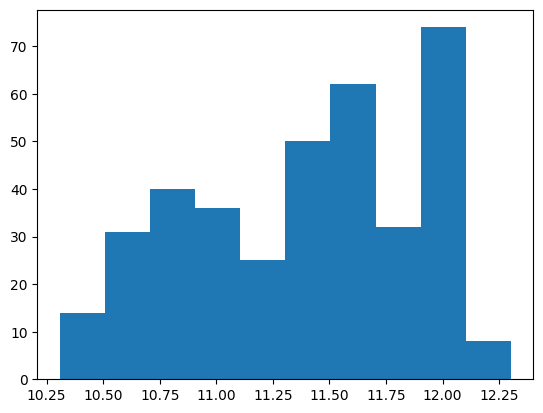

In [ ]:
plt.hist(df['Salary'])

<font color = 'blue'> <b> **Magic Code End!**

In [ ]:
# separating target and features
x = df.drop(columns = ['Salary'])
y = df['Salary']

In [ ]:
x.shape # will give the row,column numbers

(372, 5)

In [ ]:
y.shape

(372,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# <font color = 'brown'> <font size = '5'> <b> K Fold Cross Validation

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GB_rgrsr = GradientBoostingRegressor(loss='absolute_error',
                                     learning_rate=0.1,
                                     n_estimators=100,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     max_depth=3,
                                     max_features=None,
                                     max_leaf_nodes=None
                                     )

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(5, shuffle = True, random_state = 42)

results1 = cross_val_score(GB_rgrsr, x_train, y_train, cv = k_fold, scoring = 'neg_mean_squared_error')
results2 = cross_val_score(GB_rgrsr, x_train, y_train, cv = k_fold, scoring = 'neg_mean_absolute_percentage_error')
results3 = cross_val_score(GB_rgrsr, x_train, y_train, cv = k_fold, scoring = 'r2')

In [ ]:
results1 #negative MSE

array([-0.02722534, -0.02289971, -0.02294178, -0.01570586, -0.01092688])

In [ ]:
results2 #negative MAPE

array([-0.01026724, -0.00840025, -0.0095696 , -0.00827522, -0.00614841])

In [ ]:
results3 # R2

array([0.90420217, 0.91038254, 0.926396  , 0.93225644, 0.952459  ])

In [ ]:
overall_MAE_percentage = (sum(results2)/len(results2))
print(abs(overall_MAE_percentage)*100) #error will be shown in percentage

0.8532143071913088


Huge erro (before running the magic code). Nowhere near acceptable

In [ ]:
overall_R2 = sum(results3)/len(results3)
print(overall_R2)

0.9251392294146419


# <font color = "magenta"> <b> Test Performance

In [ ]:
GB_regressor = GradientBoostingRegressor(loss='absolute_error',
                                     learning_rate=0.1,
                                     n_estimators=100,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     max_depth=3,
                                     max_features=None,
                                     max_leaf_nodes=None
                                     )
# Say these are the best hyperparameter

In [ ]:
GB_regressor.fit(x_train, y_train)

GradientBoostingRegressor(loss='absolute_error')

In [ ]:
y_pred = GB_regressor.predict(x_test)

In [ ]:
y_pred

array([10.81324508, 11.93828189, 11.7185545 , 11.46165036, 11.06125664,
       10.59666448, 11.48910438, 12.09973824, 11.63317046, 10.93857713,
       10.87751436, 11.33232693, 11.75642077, 10.83656846, 11.49281071,
       11.58766907, 11.18839662, 11.44978002, 11.92318719, 11.05639424,
       11.60183799, 11.93560184, 10.71940311, 11.58000871, 11.51777975,
       11.89008806, 11.04843879, 11.58430268, 10.59666448, 11.92425668,
       10.99223842, 11.74920792, 11.24772175, 11.92318719, 12.09974829,
       11.43818298, 10.59666448, 10.60218331, 11.54324514, 11.54218133,
       11.5605761 , 12.05279216, 10.91919515, 10.81324508, 11.54515221,
       11.54324514, 11.77528927, 11.93646522, 10.57093884, 11.00460096,
       10.59666448, 10.88666153, 10.94653258, 12.05003058, 11.92009973,
       11.93560184, 11.56104983, 11.27965492, 10.81324508, 12.03776647,
       10.59666448, 10.99485249, 10.78504985, 11.91097866, 11.37959716,
       11.6190387 , 11.75978716, 12.09973824, 11.5605761 , 10.59

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
import math

In [ ]:
print("R2 score:",r2_score(y_test, y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test, y_pred)*100) # will be shown in %
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9014912696165122
MAPE: 0.9999122278349984
MSE: 0.024242152829791686
RMSE: 0.15569891724026755


***Converting the predicted value back to lognormal and recheck***

In [ ]:
y_test

,Salary
330,10.819778
34,12.043554
15,11.736069
317,11.461632
58,10.915088
...,...
96,11.982929
197,11.951180
314,11.350407
295,11.002100


In [ ]:
y_test_lognormal = np.exp(y_test) # exp is the opposite of log so it will convert the data back to the original format
y_test_lognormal

,Salary
330,50000.0
34,170000.0
15,125000.0
317,95000.0
58,55000.0
...,...
96,160000.0
197,155000.0
314,85000.0
295,60000.0


In [ ]:
y_pred_lognormal = np.exp(y_pred)
y_pred_lognormal

array([ 49674.40432548, 153013.57032441, 122829.74640166,  95001.72843164,
        63656.49479556,  40001.18997614,  97646.04006376, 179824.78445118,
       112777.31118786,  56307.16822066,  52971.76737165,  83477.04213171,
       127570.03272909,  50846.59627851,  98008.61995229, 107760.78172422,
        72286.78528304,  93880.69194427, 150721.22123683,  63347.72306045,
       109298.50404366, 152604.03543164,  45224.90051308, 106938.44975992,
       100486.60837068, 145814.13751802,  62845.76267699, 107398.62705304,
        40001.18997614, 150882.50252351,  59411.22252194, 126653.20002537,
        76704.9677812 , 150721.22123683, 179826.59329998,  92798.24272955,
        40001.18997614,  40222.56003905, 103078.40014592, 102968.80229344,
       104880.41750994, 171577.81232534,  55226.33219723,  49674.40432548,
       103275.16452035, 103078.40014592, 129999.94036796, 152735.84741842,
        38985.25732181,  60150.25491873,  40001.18997614,  53458.53181779,
        56756.90367691, 1

In [ ]:
print("R2 score:",r2_score(y_test_lognormal, y_pred_lognormal))
print("MAPE:",mean_absolute_percentage_error(y_test_lognormal, y_pred_lognormal)*100) # will be shown in %
print("MSE:",mean_squared_error(y_test_lognormal, y_pred_lognormal))
print("RMSE:",math.sqrt(mean_squared_error(y_test_lognormal, y_pred_lognormal)))

R2 score: 0.9212410139728227
MAPE: 11.830409152312031
MSE: 162836478.87078542
RMSE: 12760.73974622104


We see that the errors change. But the MAPE was 47% before using the magic code part.  
Now the MAPE is 11%. So, the error is reduced by a great value